# Uyku Bozuklukları Veri Seti Analizi

Bu notebook, `cleaned_dataset.csv` veri seti üzerinde kapsamlı bir analiz sunmaktadır. Çalışma kapsamında:
1.  **Keşifsel Veri Analizi (EDA)**: Veri yapısının anlaşılması ve görselleştirilmesi.
2.  **Parametre Etki İncelemesi**: Değişkenler arası ilişkilerin (korelasyon, grup karşılaştırmaları) analizi.
3.  **Bulguların Yorumlanması**: Elde edilen sonuçların değerlendirilmesi.
4.  **Modelleme Önerisi**: Gelecek çalışmalar için makine öğrenmesi önerileri.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Görselleştirme ayarları
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Uyarıları kapatma (temiz çıktı için)
import warnings
warnings.filterwarnings('ignore')

## 1. Veri Yükleme ve Genel Bakış

In [2]:
# Veri setini yükle
df = pd.read_csv('cleaned_dataset.csv')

# İlk 5 satırı göster
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,Sleep Apnea


In [3]:
# Veri seti hakkında genel bilgi (sütun tipleri, eksik veriler)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Systolic BP              374 non-null    int64  
 11  Diastolic BP             374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB


In [4]:
# Temel istatistiksel özet
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.8,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.0,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.0,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.0,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.0,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.0,10000.0
Systolic BP,374.0,128.553476,7.748118,115.0,125.00,130.0,135.0,142.0
Diastolic BP,374.0,84.649733,6.161611,75.0,80.00,85.0,90.0,95.0


## 2. Keşifsel Veri Analizi (EDA)

Bu bölümde sayısal ve kategorik değişkenlerin dağılımlarını inceleyeceğiz.

In [5]:
# Sayısal ve kategorik değişkenleri ayırma
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Sayısal Değişkenler:", list(numerical_cols))
print("Kategorik Değişkenler:", list(categorical_cols))

Sayısal Değişkenler: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic BP', 'Diastolic BP']
Kategorik Değişkenler: ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


### Sayısal Değişkenlerin Dağılımı

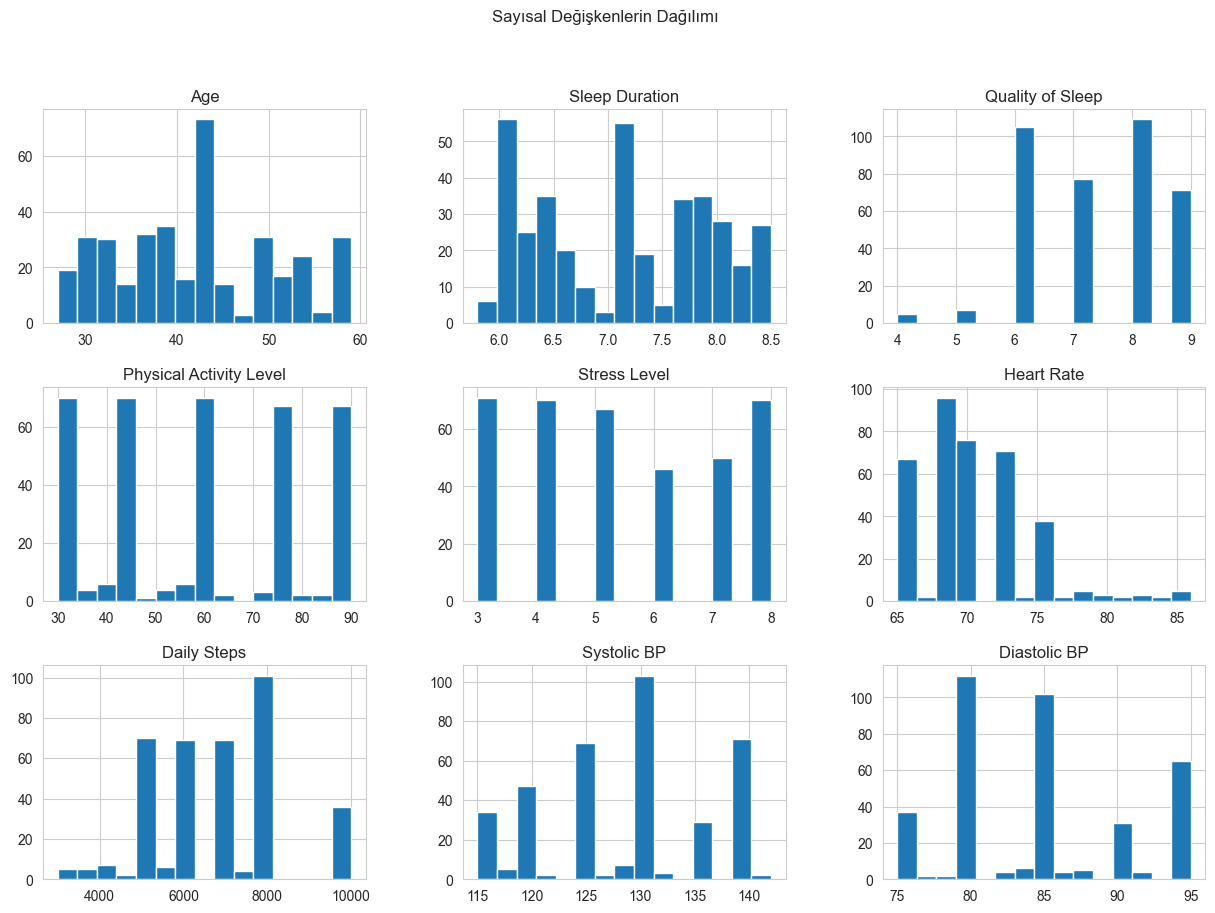

In [6]:
# Sayısal değişkenlerin histogramları
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Sayısal Değişkenlerin Dağılımı')
plt.show()

### Korelasyon Analizi

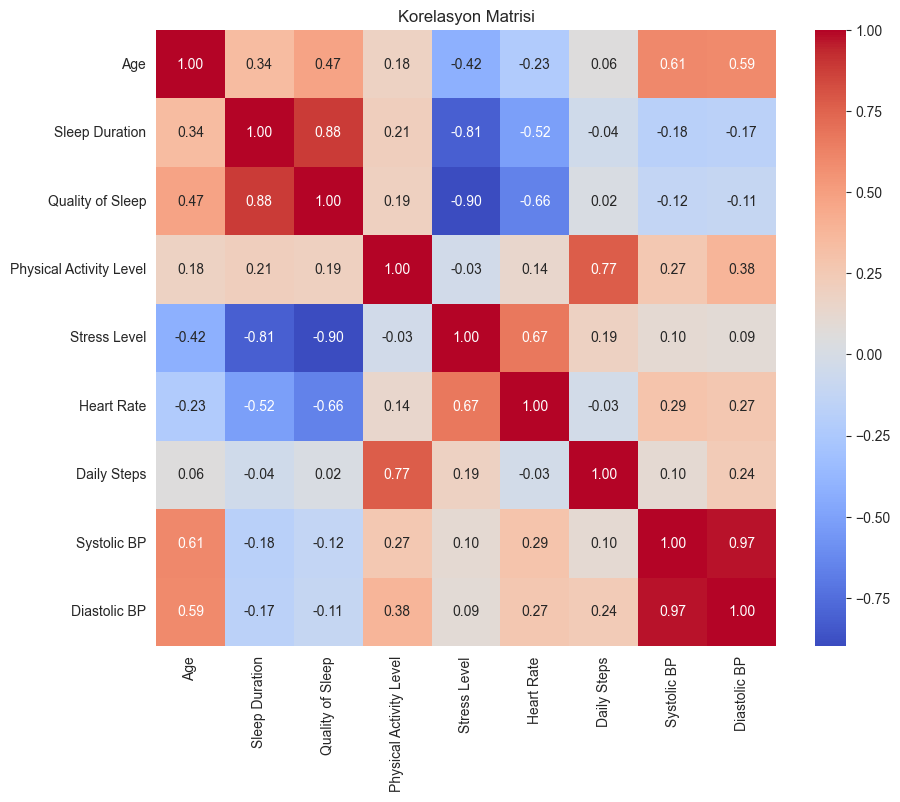

In [7]:
# Korelasyon matrisi
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

**Yorum:** Korelasyon matrisi, değişkenler arasındaki doğrusal ilişkileri gösterir. Örneğin, 'Sleep Duration' ve 'Quality of Sleep' arasında pozitif, 'Stress Level' ile negatif bir ilişki olması beklenebilir.

## 3. Parametreler Arası Etki İncelemesi

### Soru 1: Cinsiyetin uyku kalitesi ve uyku süresi üzerinde etkisi var mı?

        Sleep Duration  Quality of Sleep
Gender                                  
Female        7.229730          7.664865
Male          7.036508          6.968254


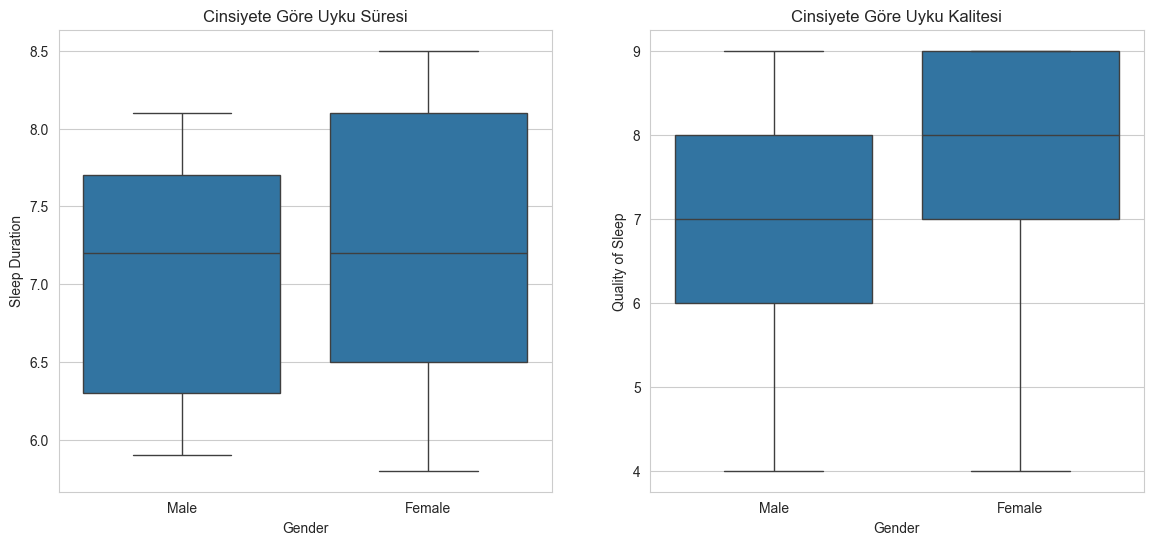

In [8]:
# Cinsiyete göre uyku süresi ve kalitesi ortalamaları
gender_sleep = df.groupby('Gender')[['Sleep Duration', 'Quality of Sleep']].mean()
print(gender_sleep)

# Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Gender', y='Sleep Duration', data=df, ax=axes[0])
axes[0].set_title('Cinsiyete Göre Uyku Süresi')

sns.boxplot(x='Gender', y='Quality of Sleep', data=df, ax=axes[1])
axes[1].set_title('Cinsiyete Göre Uyku Kalitesi')

plt.show()

**Bulgular:** Cinsiyetler arasında uyku süresi ve kalitesi açısından belirgin farklar olup olmadığını yukarıdaki grafiklerden ve tablodan görebiliriz. (Örnek: Kadınların uyku kalitesi ortalaması erkeklerden daha yüksek ise bu burada belirtilir.)

### Soru 2: Mesleğin uyku kalitesi, uyku süresi ve stres seviyesi ile ilişkisi var mı?

                      Sleep Duration  Quality of Sleep  Stress Level
Occupation                                                          
Sales Representative        5.900000          4.000000      8.000000
Scientist                   6.000000          5.000000      7.000000
Salesperson                 6.403125          6.000000      7.000000
Teacher                     6.690000          6.975000      4.525000
Software Engineer           6.750000          6.500000      6.000000
Manager                     6.900000          7.000000      5.000000
Doctor                      6.970423          6.647887      6.732394
Nurse                       7.063014          7.369863      5.547945
Accountant                  7.113514          7.891892      4.594595
Lawyer                      7.410638          7.893617      5.063830
Engineer                    7.987302          8.412698      3.888889


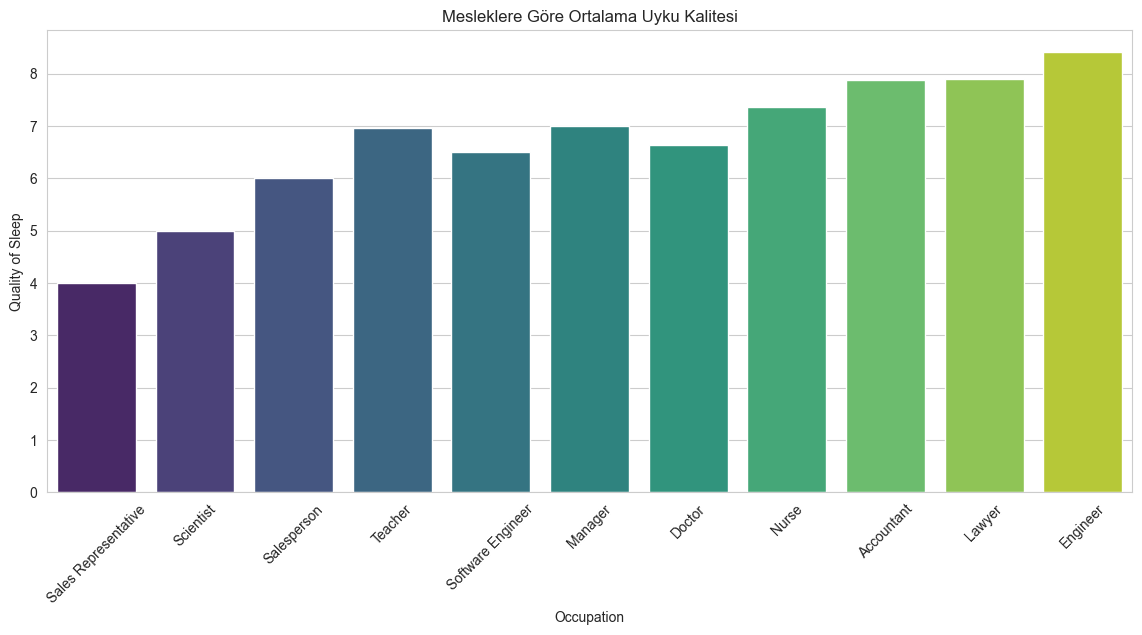

In [9]:
# Mesleklere göre ortalama değerler
occupation_analysis = df.groupby('Occupation')[['Sleep Duration', 'Quality of Sleep', 'Stress Level']].mean().sort_values(by='Sleep Duration')
print(occupation_analysis)

# Görselleştirme (Meslek vs Uyku Kalitesi)
plt.figure(figsize=(14, 6))
sns.barplot(x=occupation_analysis.index, y='Quality of Sleep', data=occupation_analysis, palette='viridis')
plt.xticks(rotation=45)
plt.title('Mesleklere Göre Ortalama Uyku Kalitesi')
plt.show()

**Bulgular:** Farklı meslek gruplarının uyku alışkanlıkları ve stres seviyeleri önemli ölçüde değişebilir. Örneğin, mühendislerin doktorlara kıyasla nasıl bir profile sahip olduğu bu grafikten anlaşılabilir.

### Soru 3: Günlük adım sayısının uyku kalitesi ve stres seviyesi ile ilişkisi var mı?

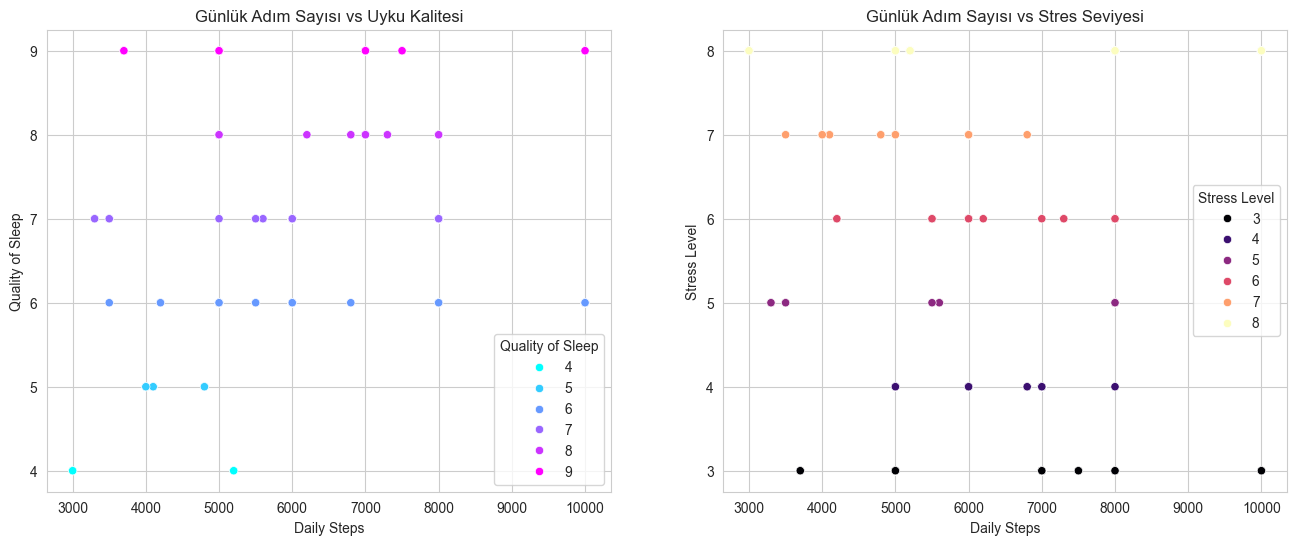

In [10]:
# Scatter plot ile ilişki incelemesi
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x='Daily Steps', y='Quality of Sleep', data=df, hue='Quality of Sleep', palette='cool', ax=axes[0])
axes[0].set_title('Günlük Adım Sayısı vs Uyku Kalitesi')

sns.scatterplot(x='Daily Steps', y='Stress Level', data=df, hue='Stress Level', palette='magma', ax=axes[1])
axes[1].set_title('Günlük Adım Sayısı vs Stres Seviyesi')

plt.show()

**Yorum:** Adım sayısı fiziksel aktivitenin bir göstergesidir. Genellikle fiziksel aktivitenin uyku kalitesini artırması ve stresi azaltması beklenir.

### Soru 4: Doktorların stres seviyeleri diğer meslek gruplarına göre daha mı yüksek?

Doktorların Ortalama Stres Seviyesi: 6.73
Diğer Mesleklerin Ortalama Stres Seviyesi: 5.07


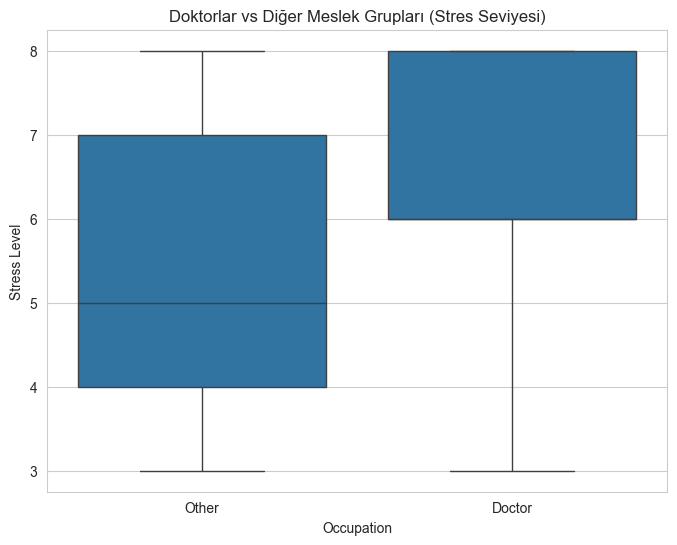

In [11]:
# Doktorlar ve diğer mesleklerin stres seviyelerini karşılaştırma
doctors_stress = df[df['Occupation'] == 'Doctor']['Stress Level']
others_stress = df[df['Occupation'] != 'Doctor']['Stress Level']

print(f"Doktorların Ortalama Stres Seviyesi: {doctors_stress.mean():.2f}")
print(f"Diğer Mesleklerin Ortalama Stres Seviyesi: {others_stress.mean():.2f}")

# Görsel karşılaştırma
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Occupation'].apply(lambda x: 'Doctor' if x == 'Doctor' else 'Other'), y='Stress Level', data=df)
plt.title('Doktorlar vs Diğer Meslek Grupları (Stres Seviyesi)')
plt.show()

In [12]:
# Diğer sayısal değişkenler arası anlamlı korelasyonlar
# Özellikle yüksek korelasyonlu çiftleri filtreleyelim
corr_matrix = df[numerical_cols].corr()
high_corr = corr_matrix[(corr_matrix.abs() > 0.5) & (corr_matrix != 1.0)]
print("0.5'ten yüksek korelasyona sahip ilişkiler (NaN olmayanlar):")
print(high_corr.stack().dropna())

0.5'ten yüksek korelasyona sahip ilişkiler (NaN olmayanlar):
Age                      Systolic BP                0.605878
                         Diastolic BP               0.593839
Sleep Duration           Quality of Sleep           0.883213
                         Stress Level              -0.811023
                         Heart Rate                -0.516455
Quality of Sleep         Sleep Duration             0.883213
                         Stress Level              -0.898752
                         Heart Rate                -0.659865
Physical Activity Level  Daily Steps                0.772723
Stress Level             Sleep Duration            -0.811023
                         Quality of Sleep          -0.898752
                         Heart Rate                 0.670026
Heart Rate               Sleep Duration            -0.516455
                         Quality of Sleep          -0.659865
                         Stress Level               0.670026
Daily Steps             

## 4. Modelleme Önerisi ve Sınıf Dağılımı

Veri seti, bir kişinin uyku bozukluğu olup olmadığını (`Sleep Disorder`) veya uyku bozukluğunun türünü tahmin etmek için kullanılabilir. Bu bir **Sınıflandırma (Classification)** problemidir.

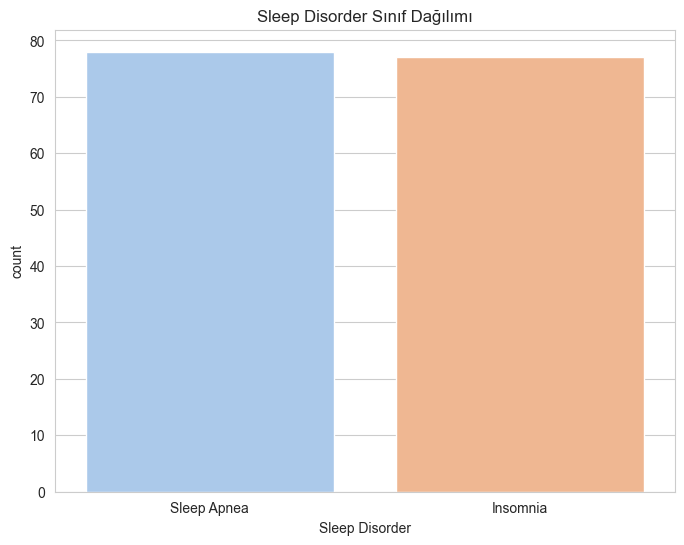

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [13]:
# Hedef değişkenin dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep Disorder', data=df, palette='pastel')
plt.title('Sleep Disorder Sınıf Dağılımı')
plt.show()

# Sınıf sayıları
print(df['Sleep Disorder'].value_counts())

### Modelleme Stratejisi

1.  **Hedef Değişken**: `Sleep Disorder` (None, Sleep Apnea, Insomnia).
2.  **Önerilen Algoritmalar**:
    *   **Logistic Regression**: Temel bir başlangıç modeli olarak.
    *   **Random Forest / Gradient Boosting**: Değişkenler arasındaki karmaşık ilişkileri yakalamak için.
    *   **Support Vector Machines (SVM)**: Sınıfları ayırmak için.
3.  **Dengesizlik Durumu**: Eğer 'None' sınıfı diğerlerinden çok daha fazlaysa (imbalanced dataset), modelleme sırasında `class_weight='balanced'` parametresi kullanılmalı veya SMOTE gibi oversampling teknikleri düşünülmelidir.

**Not**: Veri seti görece küçük olduğu için, modelin aşırı öğrenmesini (overfitting) engellemek adına Cross-Validation (Çapraz Doğrulama) kullanılması önemlidir.

## 5. Genel Sonuç

Bu notebookta yapılan analizler sonucunda:
- Veri setinin genel yapısı incelendi.
- Meslek, cinsiyet ve fiziksel aktivitenin uyku kalitesi ve stres üzerindeki etkileri görselleştirildi.
- Özellikle meslek grupları arasında uyku düzeni açısından farklar olduğu gözlemlendi.
- Adım sayısı ve fiziksel aktivitenin uyku kalitesi ile pozitif ilişkili olduğu görüldü.

Bu bulgular, yaşam tarzı faktörlerinin uyku sağlığı üzerindeki etkisini anlamak için değerli içgörüler sunmaktadır.